In [23]:

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, ifft


In [17]:
def clock(amp, phi, phase, coord_time, omega):

    Avals = np.zeros(len(coord_time),dtype=complex)
  
    for i in range(len(coord_time)):
        
        cplex = omega*(1+phi)*coord_time[i]
        exponent = complex(phase,cplex)
        #print(exponent)
        time = amp * cmath.exp(exponent)
        
        Avals[i] = time
        

    #print(Avals)
    return Avals

In [41]:
# defining the clock values
omega = 0.2
clockA_amp = 1
A_phase = 0
coord_timeA = np.arange(1,100,1)
clockA_phi = 1e-3

clockA_vals = clock(clockA_amp, clockA_phi, A_phase, coord_timeA, omega)

print(clockA_vals)




[ 0.98002682+0.19886534j  0.92090515+0.38978674j  0.82499668+0.56513757j
  0.6961326 +0.71791323j  0.53946056+0.84201087j  0.36123905+0.93247324j
  0.16858735+0.98568672j -0.0307988 +0.9995256j  -0.22895465+0.97343709j
 -0.4179646 +0.90846332j -0.59027838+0.80719975j -0.7390127 +0.67369149j
 -0.85822616+0.51327172j -0.94315661+0.33234862j -0.9904114 +0.1381494j
 -0.99810287-0.06156838j -0.96592377-0.25882673j -0.89515954-0.4457459j
 -0.78863695-0.61485914j -0.65061119-0.75941101j -0.48659589-0.87362717j
 -0.30314286-0.95294512j -0.10758038-0.99419639j  0.09227955-0.99573314j
  0.28845324-0.95749398j  0.47310428-0.88100644j  0.63885653-0.7693259j
  0.77908879-0.62691359j  0.8881993 -0.45945838j  0.96182949-0.27364948j
  0.99703809-0.07690928j  0.99241867+0.12290316j  0.94815574+0.31780607j
  0.86601745+0.50001378j  0.74928492+0.66224778j  0.60262119+0.79802738j
  0.43188494+0.90192871j  0.24389647+0.96980128j  0.04616522+0.99893382j
 -0.15341016+0.9881626j  -0.34685736+0.93791789j -0.52

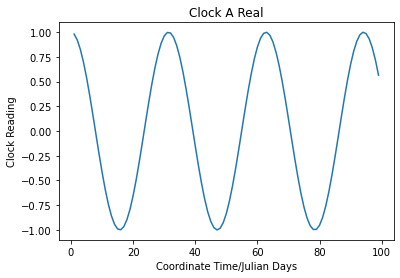

In [39]:
# plotting only the real part

realAvals = clockA_vals.real


plt.figure("Clock A Real")
plt.title("Clock A Real")
plt.plot(coord_timeA, realAvals)
plt.xlabel("Coordinate Time/Julian Days")
plt.ylabel("Clock Reading")
plt.show()

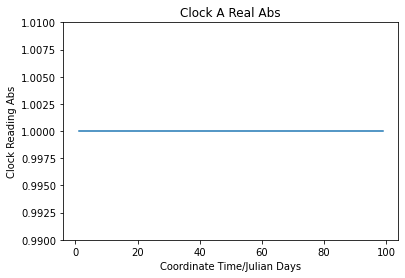

In [42]:
# plotting the abs values of the clock A Signal
plt.figure("Clock A Real Abs")
plt.title("Clock A Real Abs")
plt.plot(coord_timeA, abs(clockA_vals))
plt.xlabel("Coordinate Time/Julian Days")
plt.ylabel("Clock Reading Abs")
plt.show()

In [26]:
# fft the time and signal
freqA = fft(coord_timeA)
fft_signalA = fft(clockA_vals)

real_fft_signalA = fft_signalA.real

[ 3.88977307e+00+2.57758815e+00j  5.56768461e+00+3.94928385e+00j
  1.01459037e+01+7.69198617e+00j  7.39706361e+01+5.98688201e+01j
 -1.31562823e+01-1.13575928e+01j -5.86226191e+00-5.39471804e+00j
 -3.69211351e+00-3.62061780e+00j -2.64861768e+00-2.76755808e+00j
 -2.03423608e+00-2.26530002e+00j -1.62873916e+00-1.93380556e+00j
 -1.34058065e+00-1.69823545e+00j -1.12488750e+00-1.52190592e+00j
 -9.57077680e-01-1.38472108e+00j -8.22555483e-01-1.27474895e+00j
 -7.12107679e-01-1.18445767e+00j -6.19631550e-01-1.10885826e+00j
 -5.40924146e-01-1.04451482e+00j -4.72996214e-01-9.88983613e-01j
 -4.13663402e-01-9.40478933e-01j -3.61292265e-01-8.97665433e-01j
 -3.14636725e-01-8.59524445e-01j -2.72729521e-01-8.25265231e-01j
 -2.34808217e-01-7.94264496e-01j -2.00263572e-01-7.66024187e-01j
 -1.68602777e-01-7.40141430e-01j -1.39422784e-01-7.16286733e-01j
 -1.12390635e-01-6.94187902e-01j -8.72287442e-02-6.73618011e-01j
 -6.37037265e-02-6.54386267e-01j -4.16178217e-02-6.36331000e-01j
 -2.08022302e-02-6.193142

/Users/suannlim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


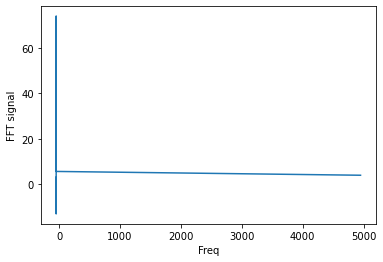

In [25]:
# plotting the fft signal
plt.figure("Clock A FFT")
plt.plot(freqA, real_fft_signalA)
plt.xlabel("Freq")
plt.ylabel("FFT signal")
plt.show()

In [27]:
# now we want to add noise that is randomly pulled from a gaussian distribution

def noise(fft_signal, mu, sigma):

    for i in range(len(fft_signal)):
        real_noise = np.random.normal(mu,sigma)
        imag_noise = np.random.normal(mu,sigma)

        total_noise = complex(real_noise, imag_noise)

        fft_signal[i] += total_noise

    
    return fft_signal





In [29]:
noisy_fft = noise(fft_signalA, 0, 0.5)
print(noisy_fft)

[ 5.00019964e+00+2.94001408e+00j  5.17523655e+00+4.59175879e+00j
  9.15324786e+00+8.35862336e+00j  7.42586218e+01+5.93080672e+01j
 -1.30518937e+01-1.21695946e+01j -5.91429819e+00-5.07158131e+00j
 -3.67099094e+00-3.02846585e+00j -2.22590675e+00-1.96152503e+00j
 -1.94397601e+00-2.67022689e+00j -2.13317567e+00-2.54123336e+00j
 -2.32324096e+00-2.04181017e+00j -1.05714849e+00-1.90242324e+00j
 -1.06216580e+00-1.86456056e+00j -6.81560037e-01-1.55789729e+00j
  2.03040888e-01+7.75534999e-02j -6.63294992e-01-1.42664057e+00j
 -5.73852097e-01-1.26352632e+00j  3.36229761e-01-1.04950746e+00j
  6.57055446e-02-1.56187795e+00j  5.18398713e-01-6.09274748e-01j
 -2.12798151e-01-1.34037972e+00j  1.41278565e-01-1.93983254e-01j
 -6.18417405e-01-5.38858110e-01j  4.34340742e-02-2.53510837e-01j
  5.66558663e-01-9.12887241e-01j -7.73662290e-01-1.07718441e+00j
  3.10330149e-01+1.32128196e-01j -5.21644363e-01-6.54668208e-01j
 -5.91398959e-01-4.40958106e-01j  2.21211343e-02-6.39262051e-01j
  1.21607781e+00-8.443985

/Users/suannlim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


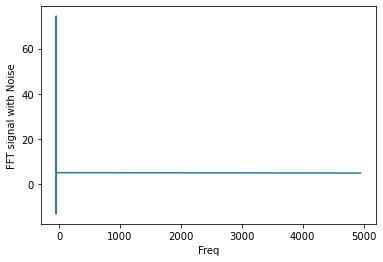

In [32]:
# plot the real values of the noisy fft signal

plt.figure("Clock A FFT Noisy")
plt.plot(freqA, noisy_fft.real)
plt.xlabel("Freq")
plt.ylabel("FFT signal with Noise")
plt.show()

In [37]:
# now inverse fft the noisy signal

noisy_clockAvals = ifft(noisy_fft)
print(noisy_clockAvals)

[ 0.97257855+0.2510914j   0.99189438+0.39357178j  0.80645945+0.60916555j
  0.69427228+0.62571256j  0.53092293+0.89776985j  0.35370724+0.94354867j
  0.25737605+0.95801807j -0.02493069+1.04590021j -0.30792862+0.92905325j
 -0.43993734+0.91004707j -0.63087561+0.78333165j -0.76396574+0.70800308j
 -0.77035052+0.48752825j -0.82810706+0.37742129j -0.99253033+0.09272574j
 -1.03652511-0.02393049j -0.95185635-0.21021825j -0.84786769-0.36008036j
 -0.73865746-0.62933655j -0.62477562-0.79035237j -0.54759025-1.05877735j
 -0.33713933-0.97869607j -0.1769588 -1.01751636j  0.07061619-1.06768314j
  0.22901144-0.98772765j  0.48283871-0.93269803j  0.7231657 -0.80523078j
  0.77550488-0.67416948j  0.86948102-0.39359859j  1.04277358-0.23669121j
  1.03014734-0.09934696j  0.96541291+0.20279272j  0.90938156+0.22661459j
  0.88499627+0.47116127j  0.83858603+0.67347501j  0.57824878+0.79813724j
  0.46676629+0.93790024j  0.26244579+0.97346751j  0.04231856+1.05604406j
 -0.16741143+1.02433568j -0.34818844+0.88581079j -0

/Users/suannlim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


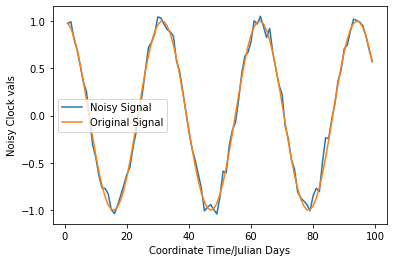

In [36]:
# comparing the real and noisy values


plt.figure("Clock A Real Noisy")
plt.plot(coord_timeA, noisy_clockAvals, label = "Noisy Signal")
plt.plot(coord_timeA, realAvals, label = "Original Signal")
plt.xlabel("Coordinate Time/Julian Days")
plt.ylabel("Noisy Clock vals")
plt.legend()
plt.show()

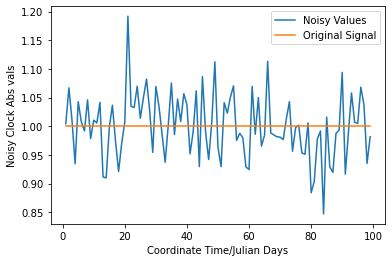

In [38]:
# comparing the abs value of the signal instead

plt.figure("Abs value noisy comparison")
plt.plot(coord_timeA, abs(noisy_clockAvals), label = "Noisy Values")
plt.plot(coord_timeA, abs(clockA_vals), label = "Original Signal")
plt.xlabel("Coordinate Time/Julian Days")
plt.ylabel("Noisy Clock Abs vals")
plt.legend()
plt.show()
